In [2]:
# %pip install optuna

In [2]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer   # 결측치값 대체.
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline


In [3]:
na_values_df = pd.read_csv("../data/final_dataset.csv")
na_values_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32545 entries, 0 to 32544
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           32545 non-null  object 
 1   code_presentation     32545 non-null  object 
 2   id_student            32545 non-null  int64  
 3   gender                32545 non-null  object 
 4   region                32545 non-null  object 
 5   highest_education     32545 non-null  int64  
 6   imd_band              32545 non-null  float64
 7   age_band              32545 non-null  int64  
 8   num_of_prev_attempts  32545 non-null  int64  
 9   studied_credits       32545 non-null  int64  
 10  disability            32545 non-null  object 
 11  date_registration     32545 non-null  float64
 12  date_unregistration   32545 non-null  float64
 13  sum_click             32545 non-null  float64
 14  avg_score             32545 non-null  float64
 15  target             

In [4]:

X = na_values_df.drop(columns='target').values
# X = X.astype('float32')
y = na_values_df['target'].values
y = y.astype(int)

X.shape,  y.shape

((32545, 15), (32545,))

In [5]:
fe_transformer = ColumnTransformer([
    ("category_ohe", OneHotEncoder(), [0, 1, 3, 4, 5, 6, 7, 8, 10]),
    ("number_scaler", StandardScaler(), [9,11,12,13,14])
])
### DataFrame이 입력일 경우 컬럼명이나 컬럼 index를 지정할 수 있다.
### ndarray가 입력일 경우 컬럼(feature) index를 지정.
new_merged_df = fe_transformer.fit_transform(X)
print(new_merged_df)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 455624 stored elements and shape (32545, 58)>
  Coords	Values
  (0, 0)	1.0
  (0, 8)	1.0
  (0, 12)	1.0
  (0, 13)	1.0
  (0, 29)	1.0
  (0, 40)	1.0
  (0, 43)	1.0
  (0, 44)	1.0
  (0, 51)	1.0
  (0, 53)	3.905125197007625
  (0, 54)	-1.8185928989610989
  (0, 55)	0.6671221427396934
  (0, 56)	-0.1670317117402033
  (0, 57)	0.7100890620793591
  (1, 0)	1.0
  (1, 8)	1.0
  (1, 11)	1.0
  (1, 19)	1.0
  (1, 29)	1.0
  (1, 33)	1.0
  (1, 42)	1.0
  (1, 44)	1.0
  (1, 51)	1.0
  (1, 53)	-0.4802620780408252
  (1, 54)	0.3332500664579271
  :	:
  (32543, 20)	1.0
  (32543, 27)	1.0
  (32543, 40)	1.0
  (32543, 42)	1.0
  (32543, 44)	1.0
  (32543, 51)	1.0
  (32543, 53)	-1.211159957215567
  (32543, 54)	0.4144516877944941
  (32543, 55)	-1.487791864498921
  (32543, 56)	-0.5562260670917427
  (32543, 57)	1.0137563256706723
  (32544, 6)	1.0
  (32544, 10)	1.0
  (32544, 11)	1.0
  (32544, 25)	1.0
  (32544, 29)	1.0
  (32544, 36)	1.0
  (32544, 42)	1.0
  (32544, 44)	1.0


In [6]:
X = new_merged_df
X = X.astype('float32')
X = X.toarray()
# y = new_merged_df['target'].values
y = y.astype(int)
X.shape,  y.shape

((32545, 58), (32545,))


 >>> Tuning Decision Tree...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:3.22862초

 >>> Tuning Random Forest...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:3.29281초

 >>> Tuning KNN...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
- Complete:4.55143초

 >>> Tuning SVM...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:23.49856초

 >>> Tuning XGBoost...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:4.69393초

 >>> Tuning Logistic Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:3.46556초

 >>> Tuning SGDClassifier...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
- Complete:0.76926초

 >>> Tuning AdaBoost...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:3.87792초

 >>> Tuning CatBoost...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
- Complete:45.78233초

 >>> Tuning Naive Bayes...
Fitting 5 folds 

c:\Users\Playdata\miniconda3\envs\my_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


- Complete:111.59559초
[✔] 전체 모델과 지표가 저장되었습니다: ../model/all_models.pkl

=== Final Comparison ===
              Model                                                                                                         Best Params  Train Accuracy (CV)  Test Accuracy
           LightGBM                                                       {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 30}             0.898681       0.898857
           CatBoost                                            {'depth': 5, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.03}             0.900688       0.898365
            XGBoost                                                       {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}             0.899623       0.897751
      MLPClassifier {'activation': 'tanh', 'alpha': 0.001, 'batch_size': 64, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}             0.895608       0.894802
      Random Forest                         

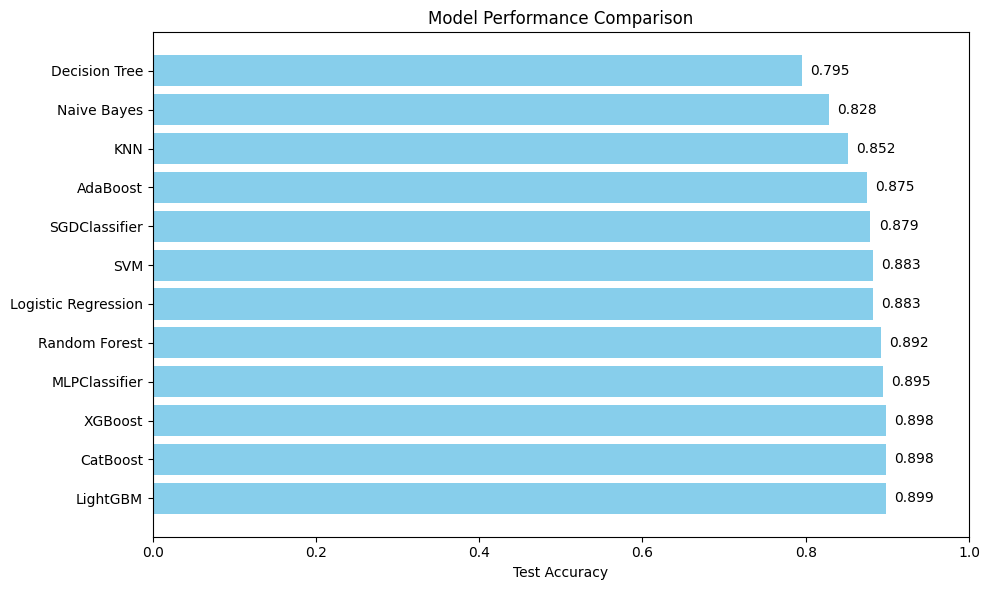


 Decision Tree Best Model Report
              precision    recall  f1-score   support

           0    0.76492   0.81476   0.78905      3822
           1    0.82587   0.77822   0.80134      4315

    accuracy                        0.79538      8137
   macro avg    0.79540   0.79649   0.79519      8137
weighted avg    0.79724   0.79538   0.79557      8137


 Random Forest Best Model Report
              precision    recall  f1-score   support

           0    0.84721   0.94008   0.89123      3822
           1    0.94122   0.84983   0.89319      4315

    accuracy                        0.89222      8137
   macro avg    0.89421   0.89495   0.89221      8137
weighted avg    0.89706   0.89222   0.89227      8137


 KNN Best Model Report
              precision    recall  f1-score   support

           0    0.79570   0.92020   0.85343      3822
           1    0.91794   0.79073   0.84960      4315

    accuracy                        0.85154      8137
   macro avg    0.85682   0.85546   

c:\Users\Playdata\miniconda3\envs\my_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [13]:
import sys
import optuna
from pathlib import Path
# 상위 폴더를 Python 경로에 추가
sys.path.append(str(Path.cwd().parent))
from util.model_tuning import auto_model_tuning
from util.model_io import save_model, load_model, save_models, load_models
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier


X = new_merged_df
X = X.astype('float32')
X = X.toarray()

y = y.astype(int)


base_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    "SGDClassifier": SGDClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "Naive Bayes": GaussianNB(),
    "LightGBM": LGBMClassifier(random_state=42),
    "MLPClassifier": MLPClassifier(max_iter=1000, early_stopping=True, random_state=42)
}

param_grids = {
    "Decision Tree": {
        "max_depth": [5], #range(1, 5),
        "max_leaf_nodes": [5], #[3, 5, 10],
        "min_samples_leaf": [2], #[2, 5, 10],
        "max_features": [3]}, #[1, 5, 10]},
    "Random Forest": {
        'n_estimators': [50], # , 100], #200, 300],
        'max_depth':[10],#, 20, 30],
        "min_samples_leaf": [2]#, 5, 10],
        },
    "KNN": {
        'n_neighbors':[3,5],
        'weights': ['uniform', 'distance']},
    "SVM": {
        'C': [0.1], #[0.001,   #, 0.1, 1, 10],
        'gamma': [0.1], #[0.01, 0.1, 1, 10],
        'kernel': ['linear']},
    "XGBoost": {
        'n_estimators': [1000],
        'learning_rate' : [0.01],
        'max_depth': [5]},
    "Logistic Regression": {
        'C': [0.1],  # 규제 강도
        'penalty': [ 'l2'],  # 규제 유형
        'solver': ['saga']},
    "SGDClassifier": {
        'loss': ['log_loss', 'hinge'],  # log_loss=로지스틱, hinge=SVM
        'alpha': [ 0.01],  # 규제 계수
        'learning_rate': ['adaptive'],
        'eta0': [0.1]},
    "AdaBoost": {
        'n_estimators': [ 100],
        'learning_rate': [0.5,]
    },
    "CatBoost": {
        'iterations': [500, 1000],
        'depth': [5], #range(4,8),
        'learning_rate': [0.03, 0.05],
        'l2_leaf_reg' : [3] #range(1, 11)
    },
    "Naive Bayes": {
        # GaussianNB has no hyperparameters commonly tuned, but for structure:
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    "LightGBM": {
        'n_estimators': [100],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [30, 50]
    },
    "MLPClassifier": {
        'hidden_layer_sizes': [(50,), (100,), (50, 30)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001],  # L2 규제 강도
        'learning_rate_init': [0.001, 0.01],
        'batch_size': [32, 64]
    }
}

# 함수 실행
results_df, best_models = auto_model_tuning(base_models, param_grids, X, y, test_size=0.25)


 >>> Tuning Decision Tree...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:3.13062초

 >>> Tuning Random Forest...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:3.46025초

 >>> Tuning KNN...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
- Complete:8.46812초

 >>> Tuning SVM...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:27.00384초

 >>> Tuning XGBoost...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:5.31584초

 >>> Tuning Logistic Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:3.23347초

 >>> Tuning SGDClassifier...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
- Complete:0.82332초

 >>> Tuning AdaBoost...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:4.14730초

 >>> Tuning CatBoost...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:12.35013초

 >>> Tuning Naive Bayes...
Fitting 5 folds f

c:\Users\Playdata\miniconda3\envs\my_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


- Complete:9.58605초

 >>> Tuning MLPClassifier...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:5.24817초
[✔] 전체 모델과 지표가 저장되었습니다: ../model/all_models.pkl

=== Final Comparison ===
              Model                                                                                                                             Best Params  Train Accuracy (CV)  Test Accuracy
      MLPClassifier {'activation': 'tanh', 'alpha': 0.001, 'batch_size': 64, 'hidden_layer_sizes': (50, 30), 'learning_rate_init': 0.001, 'max_iter': 1000}             0.896067       0.900446
           CatBoost                                                                {'depth': 4, 'iterations': 500, 'l2_leaf_reg': 4, 'learning_rate': 0.05}             0.901060       0.898448
            XGBoost                                                                           {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000}             0.899831       0.897680
           LightGBM          

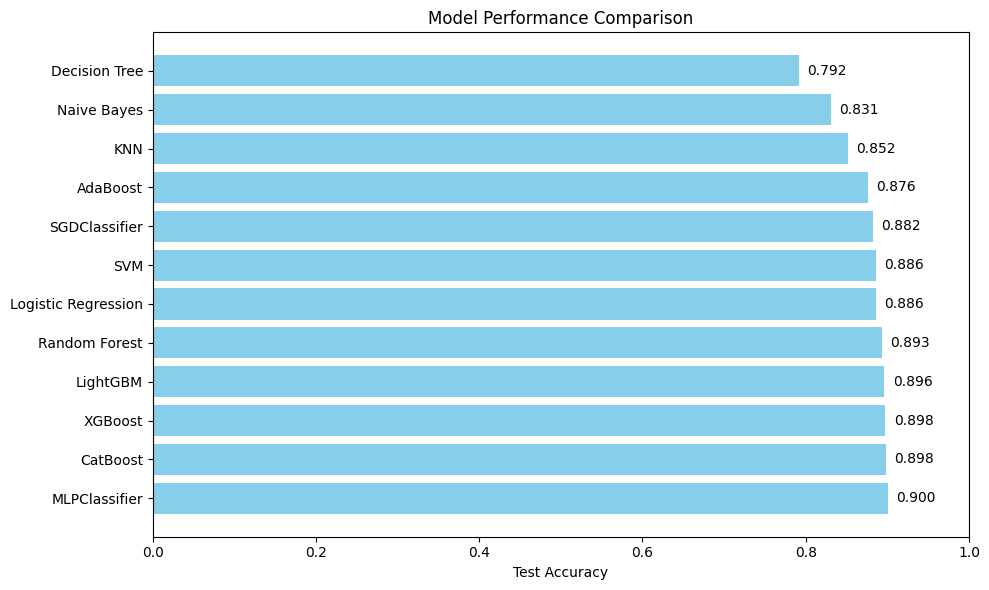


 Decision Tree Best Model Report
              precision    recall  f1-score   support

           0    0.76899   0.79516   0.78185      3056
           1    0.81308   0.78859   0.80065      3453

    accuracy                        0.79167      6509
   macro avg    0.79103   0.79187   0.79125      6509
weighted avg    0.79238   0.79167   0.79182      6509



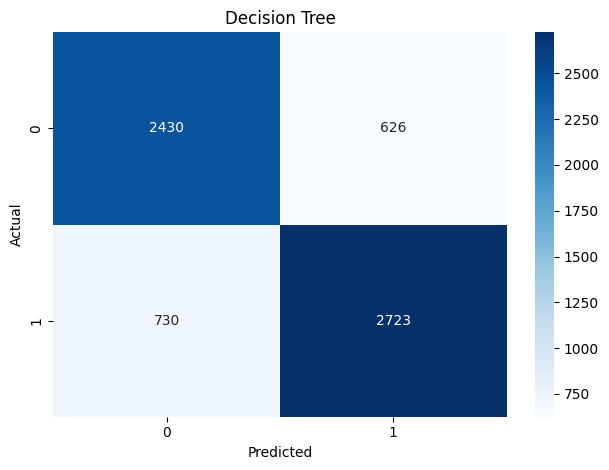


 Random Forest Best Model Report
              precision    recall  f1-score   support

           0    0.85144   0.93586   0.89166      3056
           1    0.93778   0.85549   0.89474      3453

    accuracy                        0.89322      6509
   macro avg    0.89461   0.89568   0.89320      6509
weighted avg    0.89724   0.89322   0.89330      6509



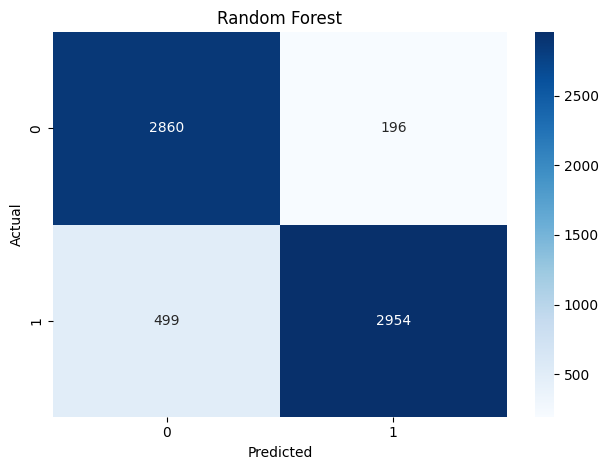


 KNN Best Model Report
              precision    recall  f1-score   support

           0    0.79863   0.91623   0.85340      3056
           1    0.91475   0.79554   0.85099      3453

    accuracy                        0.85220      6509
   macro avg    0.85669   0.85589   0.85219      6509
weighted avg    0.86023   0.85220   0.85212      6509



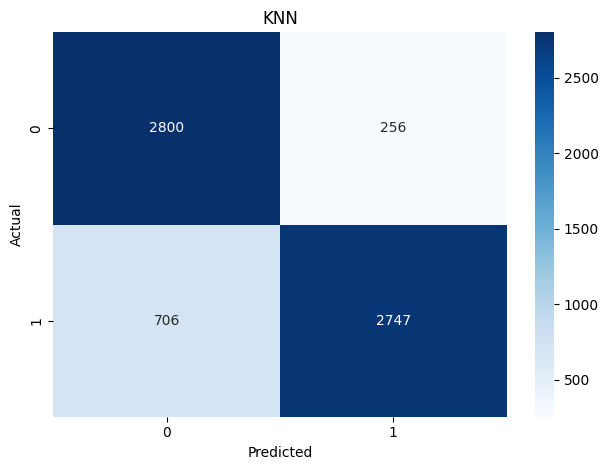


 SVM Best Model Report
              precision    recall  f1-score   support

           0    0.84256   0.93161   0.88485      3056
           1    0.93323   0.84593   0.88744      3453

    accuracy                        0.88616      6509
   macro avg    0.88789   0.88877   0.88614      6509
weighted avg    0.89066   0.88616   0.88622      6509



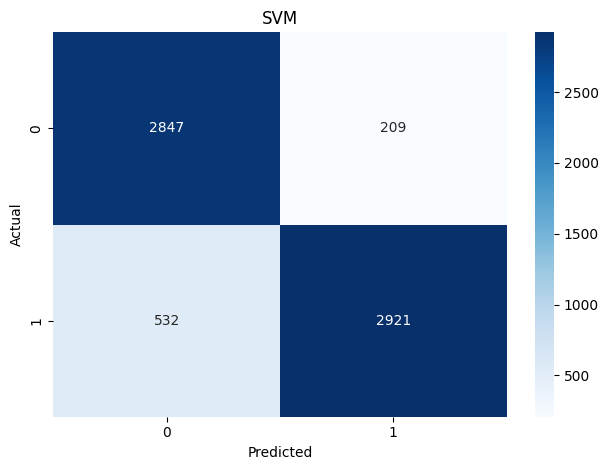


 XGBoost Best Model Report
              precision    recall  f1-score   support

           0    0.86366   0.92866   0.89499      3056
           1    0.93236   0.87026   0.90024      3453

    accuracy                        0.89768      6509
   macro avg    0.89801   0.89946   0.89761      6509
weighted avg    0.90011   0.89768   0.89777      6509



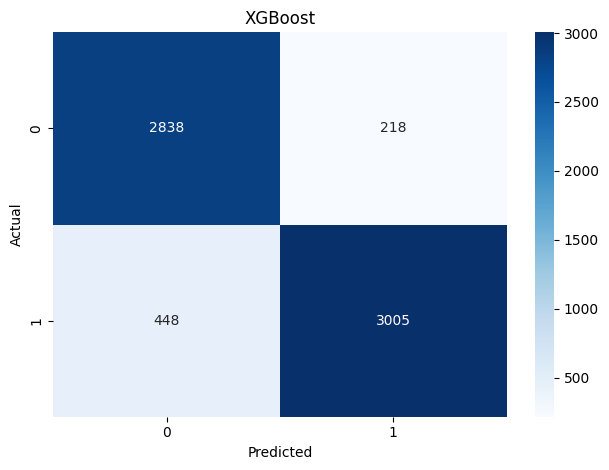


 Logistic Regression Best Model Report
              precision    recall  f1-score   support

           0    0.84712   0.92474   0.88423      3056
           1    0.92751   0.85230   0.88832      3453

    accuracy                        0.88631      6509
   macro avg    0.88732   0.88852   0.88627      6509
weighted avg    0.88977   0.88631   0.88640      6509



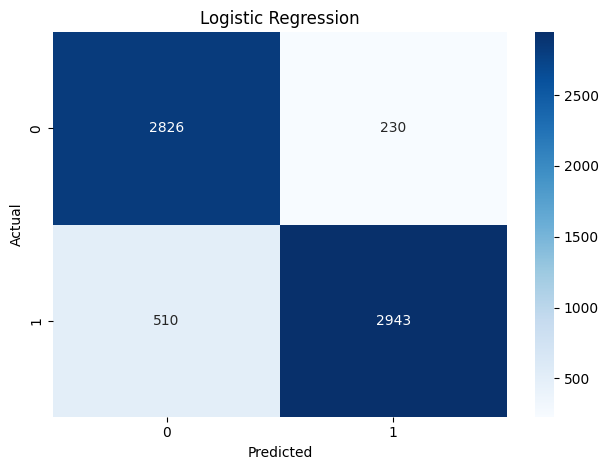


 SGDClassifier Best Model Report
              precision    recall  f1-score   support

           0    0.82784   0.94568   0.88285      3056
           1    0.94500   0.82595   0.88147      3453

    accuracy                        0.88216      6509
   macro avg    0.88642   0.88581   0.88216      6509
weighted avg    0.88999   0.88216   0.88212      6509



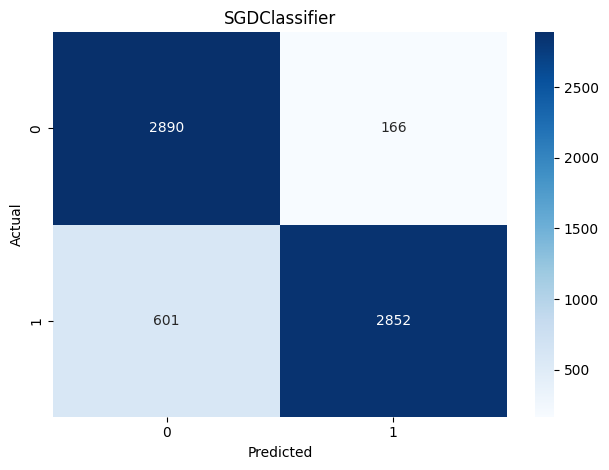


 AdaBoost Best Model Report
              precision    recall  f1-score   support

           0    0.82088   0.94175   0.87717      3056
           1    0.94073   0.81813   0.87515      3453

    accuracy                        0.87617      6509
   macro avg    0.88080   0.87994   0.87616      6509
weighted avg    0.88446   0.87617   0.87610      6509



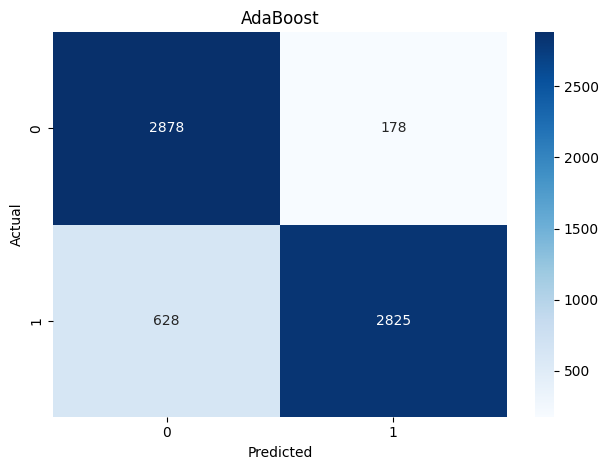


 CatBoost Best Model Report
              precision    recall  f1-score   support

           0    0.86610   0.92703   0.89553      3056
           1    0.93113   0.87315   0.90121      3453

    accuracy                        0.89845      6509
   macro avg    0.89861   0.90009   0.89837      6509
weighted avg    0.90060   0.89845   0.89854      6509



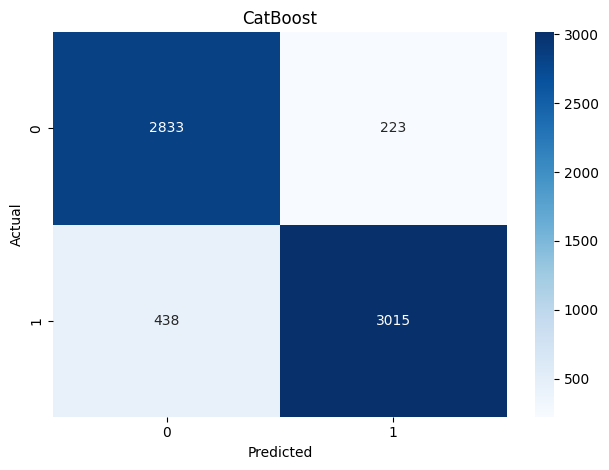


 Naive Bayes Best Model Report
              precision    recall  f1-score   support

           0    0.74414   0.97644   0.84461      3056
           1    0.97119   0.70287   0.81552      3453

    accuracy                        0.83131      6509
   macro avg    0.85766   0.83965   0.83007      6509
weighted avg    0.86459   0.83131   0.82918      6509



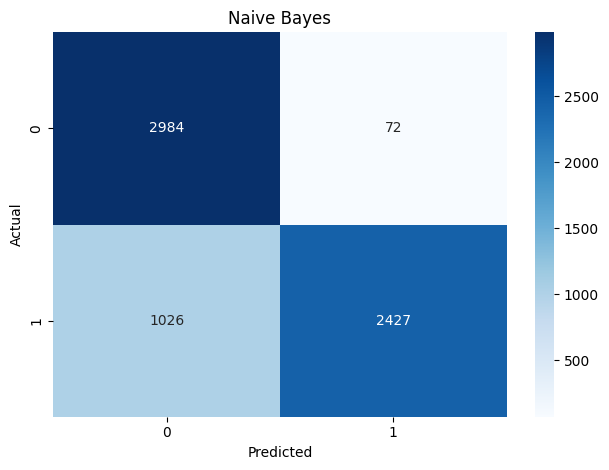


 LightGBM Best Model Report
              precision    recall  f1-score   support

           0    0.86311   0.92637   0.89362      3056
           1    0.93032   0.86997   0.89913      3453

    accuracy                        0.89645      6509
   macro avg    0.89671   0.89817   0.89638      6509
weighted avg    0.89876   0.89645   0.89655      6509



c:\Users\Playdata\miniconda3\envs\my_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


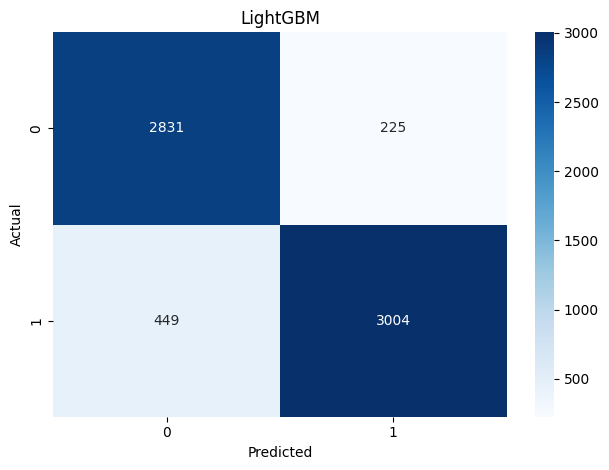


 MLPClassifier Best Model Report
              precision    recall  f1-score   support

           0    0.85791   0.94437   0.89907      3056
           1    0.94595   0.86157   0.90179      3453

    accuracy                        0.90045      6509
   macro avg    0.90193   0.90297   0.90043      6509
weighted avg    0.90461   0.90045   0.90051      6509



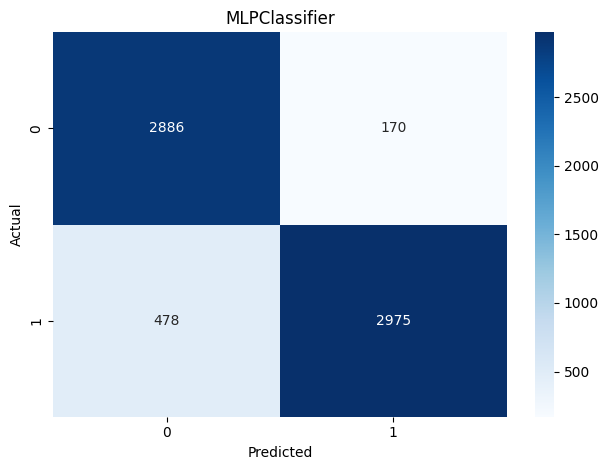

In [19]:
import sys
import optuna
from pathlib import Path
# 상위 폴더를 Python 경로에 추가
sys.path.append(str(Path.cwd().parent))
from util.model_tuning import auto_model_tuning
from util.model_io import save_model, load_model, save_models, load_models
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier


X = new_merged_df
X = X.astype('float32')
X = X.toarray()

y = y.astype(int)


base_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    "SGDClassifier": SGDClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "Naive Bayes": GaussianNB(),
    "LightGBM": LGBMClassifier(random_state=42),
    "MLPClassifier": MLPClassifier(early_stopping=True, random_state=42)
}

param_grids = {
    "Decision Tree": {
        "max_depth": [3],
        "max_leaf_nodes": [5],
        "min_samples_leaf": [2],
        "max_features": [3]},
    "Random Forest": {
        'n_estimators': [50],
        'max_depth':[10],
        "min_samples_leaf": [2]},
    "KNN": {
        'n_neighbors':[3,5],
        'weights': ['uniform', 'distance']},
    "SVM": {
        'C': [0.1],
        'gamma': [0.1],
        'kernel': ['linear']},
    "XGBoost": {
         'n_estimators': [1000],
         'learning_rate' : [0.01],
         'max_depth': [6]},
    "Logistic Regression": {
        'C': [0.1],  # 규제 강도
        'penalty': [ 'l2'],  # 규제 유형
        'solver': ['saga']},
    "SGDClassifier": {
        'loss': ['log_loss', 'hinge'],  # log_loss=로지스틱, hinge=SVM
        'alpha': [ 0.01],  # 규제 계수
        'learning_rate': ['adaptive'],
        'eta0': [0.1]},
    "AdaBoost": {
        'n_estimators': [ 100],
        'learning_rate': [0.5]},
    "CatBoost": {
        'iterations': [500],
        'depth': [4],
        'learning_rate': [0.05],
        'l2_leaf_reg' : [4]},
    "Naive Bayes": {
        # GaussianNB has no hyperparameters commonly tuned, but for structure:
        'var_smoothing': [1e-9, 1e-8, 1e-7]},
    "LightGBM": {
        'n_estimators': [100],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [30, 50]},
    "MLPClassifier": {
		'max_iter' : [1000],
        'hidden_layer_sizes': [(50,30)],
        'activation': ['tanh'],
        'alpha': [0.001],
        'learning_rate_init': [0.001],
        'batch_size': [64]}
}

# 함수 실행
results_df, best_models = auto_model_tuning(base_models, param_grids, X, y)

In [19]:
load_models("../model/all_models.pkl")

[✔] 전체 모델과 지표가 로드되었습니다: ../model/all_models.pkl


{'Decision Tree': {'model': DecisionTreeClassifier(max_depth=3, max_features=3, max_leaf_nodes=5,
                         min_samples_leaf=2, random_state=42),
  'metrics': {'best_params': {'max_depth': 3,
    'max_features': 3,
    'max_leaf_nodes': 5,
    'min_samples_leaf': 2},
   'cv_score': np.float64(0.7974344916169507),
   'test_accuracy': 0.7916730680596098,
   'classification_report': {'0': {'precision': 0.7689873417721519,
     'recall': 0.7951570680628273,
     'f1-score': 0.7818532818532818,
     'support': 3056.0},
    '1': {'precision': 0.8130785309047477,
     'recall': 0.7885896322038807,
     'f1-score': 0.8006468685680682,
     'support': 3453.0},
    'accuracy': 0.7916730680596098,
    'macro avg': {'precision': 0.7910329363384498,
     'recall': 0.7918733501333539,
     'f1-score': 0.791250075210675,
     'support': 6509.0},
    'weighted avg': {'precision': 0.7923775516469181,
     'recall': 0.7916730680596098,
     'f1-score': 0.7918232088660577,
     'support': 

In [20]:
import matplotlib.pyplot as plt


# 전처리기 정의 (예시, 실제 코드에 맞게 조정)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [0, 1, 3, 4, 5, 6, 7, 8, 10]),
        ('num', 'passthrough', [9, 11, 12, 13, 14])
    ]
)

# 원본 DataFrame의 열 이름
original_columns = na_values_df.columns.tolist()  # df는 new_merged_df 만들기 전 원본

# 전처리기를 원본에 fit
preprocessor.fit(na_values_df)

# 변환된 feature 이름 추출
feature_names = preprocessor.get_feature_names_out(original_columns)

# CatBoost 모델
model = best_models["MLPClassifier"]


# 위에서 구한 feature_names와 매칭
importance_series = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
top_features = importance_series.head(7)
importance_series.round(5)

# 시각화
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title("CatBoost - Top 20 Feature Importances")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

AttributeError: 'MLPClassifier' object has no attribute 'feature_importances_'